# 03. Training Linear Models

    # 03. Training Linear Models
        ## 3-1 Setup
        ## 3-2 Linear regression using the Normal Equation
            ### 3-2-1 선형회귀모델의 예측 
            ### 3-2-2 Normal Equation
            ### 3-2-3 computational complexity
            ### 3-2-4 Linear regression using batch gradient descent
            ### 3-2-5 배치 경사 하강법  
            ### 3-2-6 Stochastic Gradient Descent
            ### 3-2-7 Mini-batch gradient descent
            ### 3-2-8 Polynomial regression
            ### 3-2-9 Learning Curve
        ## 3-3 Regularized models
            ### 3-3-1 Lidge Regression
            ### 3-3-2 정규방정식을 사용한 Lidge회귀
            ### 3-3-3 Lasso Regression
            ### 3-3-4 Elastic Net
        ## 3-4 Early stopping  
        ## 3-5 Logistic regression
            ### 3-5-1 확률 추정
            ### 3-5-2 train and cost function
            ### 3-5-3 Decision Boundary(결정 경계)
            ### 3-5-4 softmax regression
        ## 3-6 Exercise        

## 3-1 Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 3-2 Linear regression using the Normal Equation

* 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터를 해석적으로 구함  
* 경사 하강법(Gradient Descendent)라 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화시킴  
* 결국 앞의 방법과 동일한 파라미터로 수렴함  

### 3-2-1 선형회귀모델의 예측 

$\hat { y } = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}  +\dots+\theta_{n}x_{n}$  

* $\hat {y}$: 예측값  
* $n$: 특성의 수  
* $x_{i}$: i번째 특성  
* $\theta_{j}$: j번째 모델 파라미터(편향 $\theta_{0}$와 특성의 가중치 $\theta_{1}, \theta_{2}, \dots, \theta_{n}$)  

---

위 식은 벡터 형태로 더 간단하게 쓸 수 있음  
$\hat {y} = h_{\theta}\left(x  \right)$ = $\theta^{T} \cdot x$  

* $\theta$는 bias $\theta_{0}$와 $\theta_{1} ~ \theta_{n}$까지의 특성 가중치를 담고 있는 모델의 파라미터 벡터  
* $\theta^{T}$는 $\theta$의 Transpose  
* $x$는 $x_{0}$ ~ $x_{n}$까지 담고 있는 샘플의 **특성 벡터**, $x_{0}$는 항상 1  
* $h_{\theta}$는 모델 파라미터 $\theta$를 사용항 hypothesis 함수  

---

Regresssion에 가장 널리 사용되는 성능 측정 지표는 RMSE라고 함  
실제로는 RMSE보다 MSE를 최소화하는 것이 같은 결과를 내면서 더 간단함  

$MSE(X, h_{\theta})  =     \frac{1}{m} \sum{\left( \theta^{T} \cdot x^{(i)} - y^{(i)} \right)^{2}}$

### 3-2-2 Normal Equation

비용 함수를 최소화하는 $\theta$ 값을 찾기 위한 **Normal Equation**  
$\hat {\theta} = \left( X^{T} \cdot X \right)^{-1}\cdot X^{T} \cdot y$  

* $\hat {\theta}$ 비용 함수를 최소화하는 $\theta$값  
* $y$: $y^{(1)} ~ y^{(m)}$까지 포함하는 target vector

--- 

* 선형처럼 보이는 데이터 생성

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

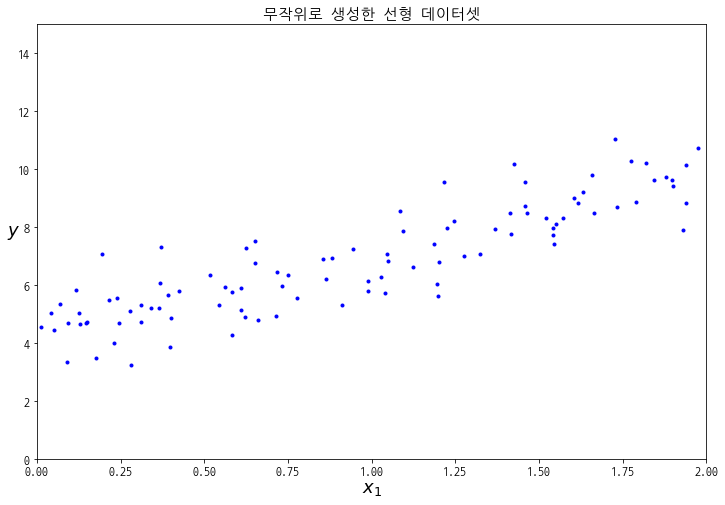

In [3]:
plt.figure(figsize=(12, 8))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.title("무작위로 생성한 선형 데이터셋")
plt.show()

___

* 정규방정식을 사용하여 $\hat {\theta}$을 계산  
* np.linalg.inv()함수를 이용하여 역행렬을 계산하고 dot()으로 행렬 곱  
$\hat {\theta} = \left( X^{T} \cdot X \right)^{-1}\cdot X^{T} \cdot y$  

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

이 데이터를 생성하기 위해 사용한 실제 함수는  

$y = 4 + 3x_{1} + gaussian \quad noise$

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

$\theta_{0}=4.21509616$, $\theta_{1}=2.77011339$ 대신 $\theta_{0}=4$, $\theta_{1}=3$을 기대했지만 원래 함수의 파라미터를 정확하게 재현하지 못함  

$\hat{\theta}$을 사용하여 예측을 사용

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

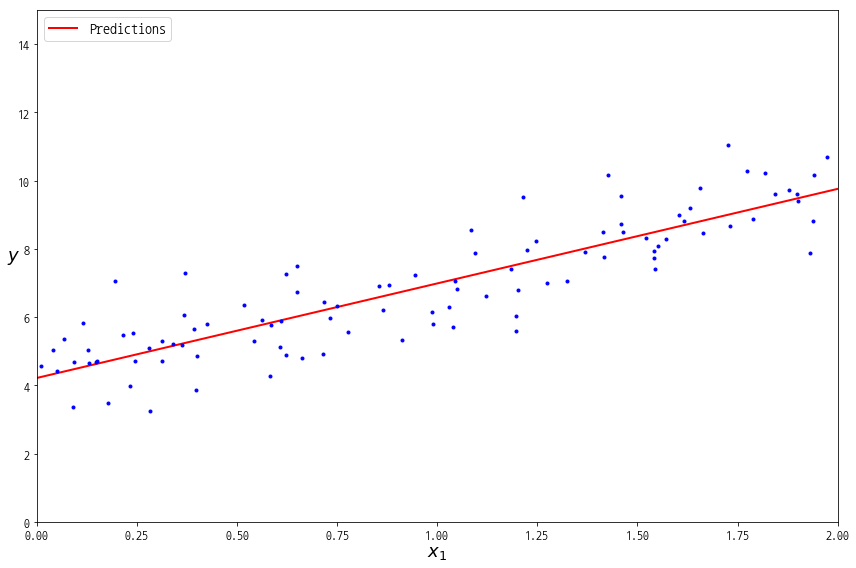

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.tight_layout()
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_ # theta_best

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

### 3-2-3 computational complexity
정규방정식은 (n+1) x (n+1) 크기가 되는 $X^{T}\cdot X$의 역행렬을 계산(n은 특성 수)  
역행렬을 계산하는 computational complexity는 일반적으로 $n^{2.4}$ ~ $n^{3}$사이이며(구현 방법에 따라 차이가 있음)  
특성수가 2배로 늘어나면 계산시간이 약 $2^{2.4}=5.3$에서 $2^{3}=8$배로증가함  


X를 (n_samples, n_features)인 $m \times n$ 행렬이라 할때 $X^{T}\cdot X$는 $(n \times m) \cdot (m \times n)=(n \times n)$크기의 행렬이 되므로 샘플 수(m)가 역행렬의 계산도를 증가시키지 않고 행렬곱의 양만 선형적으로 증가함  

따라서 메모리 공간이 허용되는 범위에서는 큰 훈련 세트도 효율적으로 처리할 수 있음  
또한 학습된 선형 회귀 모델을 예측이 매우 빠르며 예측 계산 복잡도는 샘플 수와 특성 수에 선형적임  

**예측하려는 샘플이 2배로 들어나면(특성이 두배로 늘어나거나) 걸리는 시간도 2배 증가함**

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

### 3-2-4 Linear regression using batch gradient descent

이 방법은 특성이 매우 많고 훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 때 적합함  
경사하강법은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 매우 일반적인 최적화 알고리즘  
경사하강법의 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것  

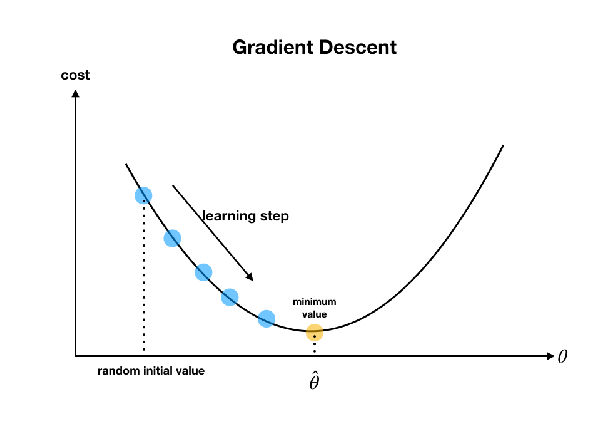

In [12]:
import matplotlib.image as mpimg
plt.figure(figsize=(12, 6))
gradient_images = mpimg.imread("./images/gradient_descent.png")
plt.imshow(gradient_images)
plt.axis("off")
plt.tight_layout()
plt.show()

Gradient Descent에서 중요한 파라미터는 step의 크기(learning_rate)로 결정됨

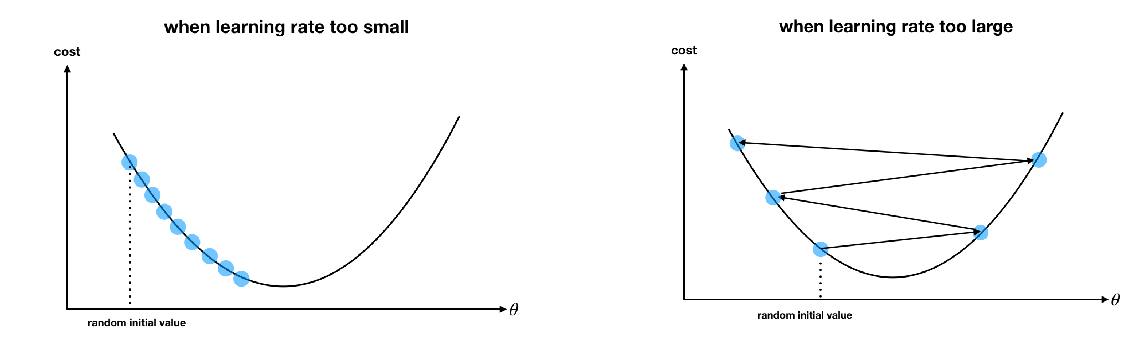

In [13]:
import matplotlib.image as mpimg
plt.figure(figsize=(20, 6))
gradient_small = mpimg.imread("./images/gradient_small.png")
gradient_large = mpimg.imread("./images/gradient_large.png")

plt.subplot(121)
plt.imshow(gradient_small)
plt.axis("off")

plt.subplot(122)
plt.imshow(gradient_large)
plt.axis("off")

plt.show()

---

* 모든 비용함수가 위 그림처럼 생기지 않고 아래와 같이 생길수도 있음
* 무작위 초기화이기 때문에 알고리즘이 왼쪽에서 시작하면 local minimum에 수렵할수도 있고, 또한  
오른쪽에서 시작하면 평탄한지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되면 최솟값에 도달하지 못함

선형회귀를 위한 Mean Square Error 함수는 어떠한 두 점을 선택해 그어도 곡선을 가로지르지 않는 convex function(볼록함수)이기 때문에 이는 단 하나의 최솟값 혹은 최댓값만 있다는 뜻

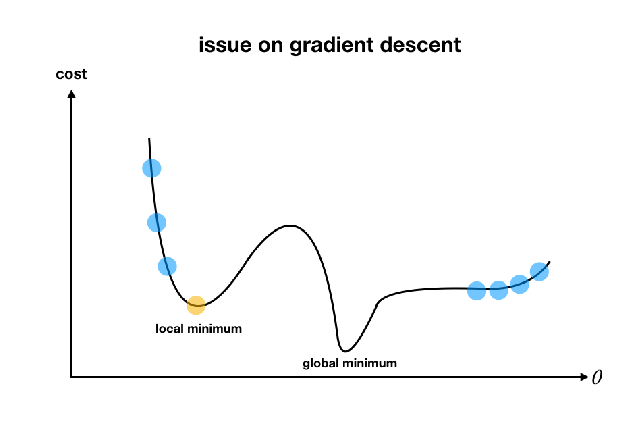

In [14]:
import matplotlib.image as mpimg
plt.figure(figsize=(20, 6))
gradient_issue = mpimg.imread("./images/issue_gradient.png")
plt.imshow(gradient_issue)
plt.axis("off")
plt.tight_layout()
plt.show()

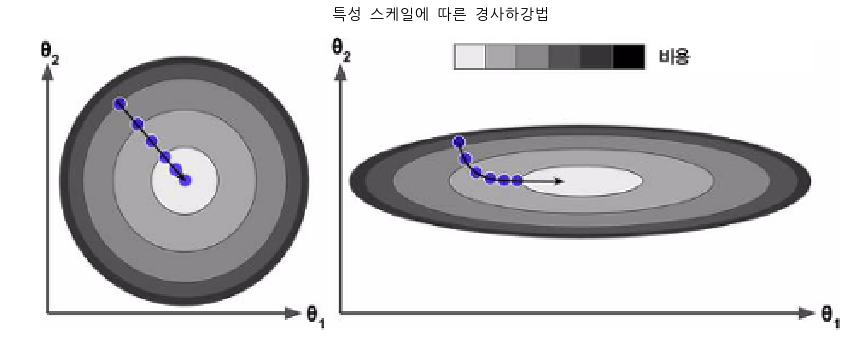

In [15]:
import matplotlib.image as mpimg
plt.figure(figsize=(12, 6))
feature_img = mpimg.imread("./images/feature_scale.png")
plt.imshow(feature_img)
plt.axis("off")
plt.tight_layout()
plt.title("특성 스케일에 따른 경사하강법")
plt.show()

왼쪽: 특성1과 특성2의 스케일이 같은 경우  
오른쪽: 특성1이 특성2보다 더 작은 경우

특성1이 특성2보다 더 작기 때문에 비용함수에 영향을 주기 위해서는 $\theta_{1}$이 더 크게 바뀌어야함. 그래서 $\theta_{1}$축을 따라서 길쭉한 모양이 됨  

그림에서 볼 수 있듯이 왼쪽의 경사 하강법이 최솟값으로 더 빠르게 진행되지만 오른쪽 같은경우는 평편한 지역을 만나기 때문에 최솟값에 도달하는데 더 오래 시간이 걸릴 것으로 추정됨  

모델이 가진 파라미터가 많을수록 공간의 차원은 커지고 검색은 어려워지며 시간은 오래 걸림  

넓은 백사장(차원이 매우 큼)에서 바늘을 찾는 것보다 작은 바구니(차원이 작음)에서 바늘을 찾는 것이 더 쉬움. 그러나 선형회귀는 비용함수가 볼록 함수이기 때문에 아무리 넓거나 아무리 작아도 그릇의 맨 아래에 바늘이 있을 것이므로 탐색도 빠르고 속도도 빠름

### 3-2-5 배치 경사 하강법

경사 하강법을 구현하려면 각 모델 파라미터 $\theta_{j}$에 대해 비용 함수의 그래디언트를 계산해야 함  
다시 말해 $\theta_{j}$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야 함 --> partial derivative  

$\frac { \partial  }{ \partial \theta _{ j } } MSE(\theta )=\frac { 2 }{ m } \sum _{  i=1}^{ m } \left( \theta ^{ T }\cdot x^{ (i) }-y^{ (i) } \right) x^{(i)}_{j}$  

partial function을 각각 계산하는 대신 $\triangledown_{\theta}MSE \left(\theta \right)$로 한번에 계산할 수 있음  

$\triangledown_{\theta}MSE \left(\theta \right) = \begin{pmatrix} \frac { \partial  }{ \partial \theta _{ 0 } } MSE\left( \theta  \right)  \\ \frac { \partial  }{ \partial \theta _{ 1 } } MSE\left( \theta  \right)  \\ \vdots \\ \frac { \partial  }{ \partial \theta _{ 2 } } MSE\left( \theta  \right)  \end{pmatrix} = \frac {2}{m}X^{T} \cdot \left(X \cdot \theta-y \right)$  

위로 향하는 그래디언트 벡터가 구해지면 반대 방향으로 가야 함  
$\theta$에서 $\triangledown_{\theta}MSE \left(\theta \right)$를 빼야함  

내려가는 step의 크기를 결정하기 위해 gradient에 $\eta$가 사용  
$\theta^{(next step)} = \theta - \eta \triangledown_{\theta}MSE \left(\theta \right)$

In [16]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initial

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [17]:
theta

array([[4.21509616],
       [2.77011339]])

In [18]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [19]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

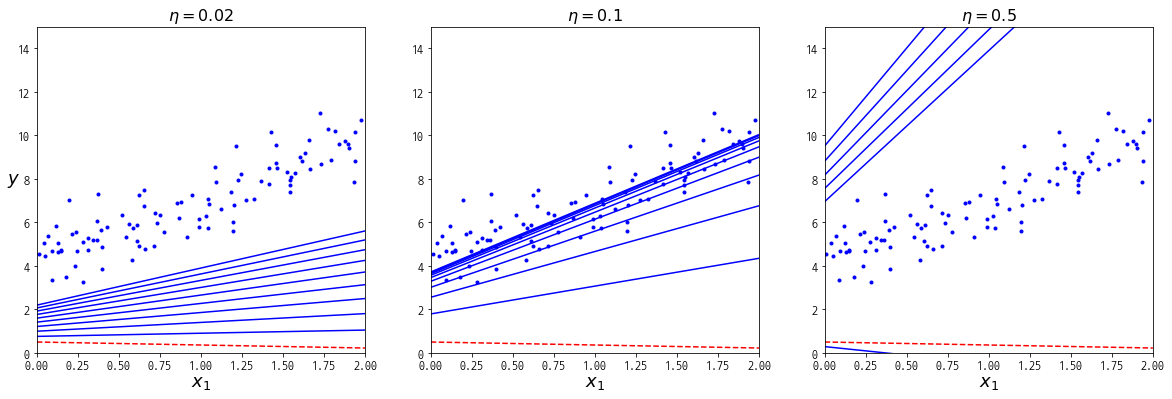

In [20]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(20, 6))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

왼쪽은 학습률이 너무 낮으며 시간이 오래 걸릴 것  
가운데는 적당하며  
오른쪽은 학습률이 너무 높아 결국에 발산함  

적절한 학습률을 찾으려면 grid search를 사용.  
그러나 grid search에서 수렴하는데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한  

반복 횟수가 너무 작으면 최적점에 도달하기 전에 알고리즘에 멈춤  
너무 크면 모델 파라미터가 더 이상 변하지 않는 동안 시간 낭비  

해결책: 반복회수를 아주 크게 지정하고, gradient vector가 아주 작아지면, 즉 vector norm이 어떤 $\varepsilon $(허용오차, tolerance)보다 작아지면 경사 하강법이 거의 최솟값에 도달한 것으로 알고리즘 중지

### 3-2-6 Stochastic Gradient Descent

* batch Gradient Descent의 가장 큰 문제는 매 step에서 전체 훈련 세트를 사용해 그래디언트를 계산  
train set가 커지면 매우 느려지게 됨  

* Stochastic Gradient Descent은 매 step에서 딱 한 개의 sample에 대한 gradient를 계산함  
* 매 반복에서 매우 적은 데이터만 처리하기 때문에 알고리즘이 확실히 훨씬 빠름  
* 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있음  
* 반면에 확률적이기 때문에 이 알고리즘은 배치 경사 하강법보다 훨씬 불안정함  
* 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래로 요동치면서 평균적으로 감소  
* 시간이 지나면 최솟값에 매우 근접하지만 요동이 지속되면서 최솟값에 안착하지 못할 것 ==> 그러나 최적치는 아님  

* 비용 함수가 매우 불규칙할 경우 알고리즘이 지역 최솟값을 건너뛸 수도 있으므로 확률적 경사 하강법이 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높음  
* 무작위성은 지역 최솟값에서 탈출시켜줘서 좋지만 알고리즘을 전역 최솟값에 다다르지 못하게 한다는 점에서 좋지 않음  

* 이 것을 해결하는 방법은 학습률을 점진적으로 감소시키는 것  
* 시작할 때는 학습률을 크게 하고(수렴을 빠르게 하고 지역 최솟값에 빠지지 않게 함), 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 함  
* 매 반복에서 학습률을 결정하는 함수를 learning schedule이라고 부름  
* 학습률이 너무 빨리 줄어들면 지역 최솟값에 갇히거나 최솟값까지 가는 중간에 멈춰버릴 수도 있음  
* 학습률이 너무 천천히 줄어들면 오랫동안 최솟값 주변을 맴돌거나 훈련을 너무 일찍 중지해서 지역 최솟값에 머무를 수 있음  

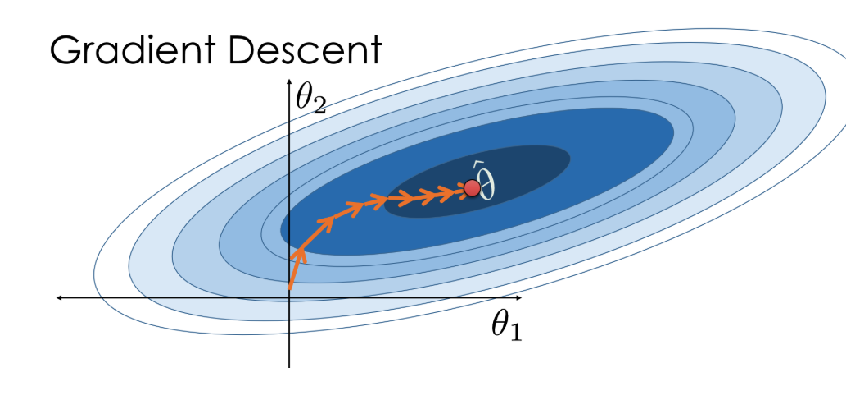

In [21]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
stochastic_img=mpimg.imread("images/sto_gd.png")
plt.figure(figsize=(12, 8))
plt.imshow(stochastic_img)
plt.tight_layout()
plt.axis("off")
plt.show()

In [22]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

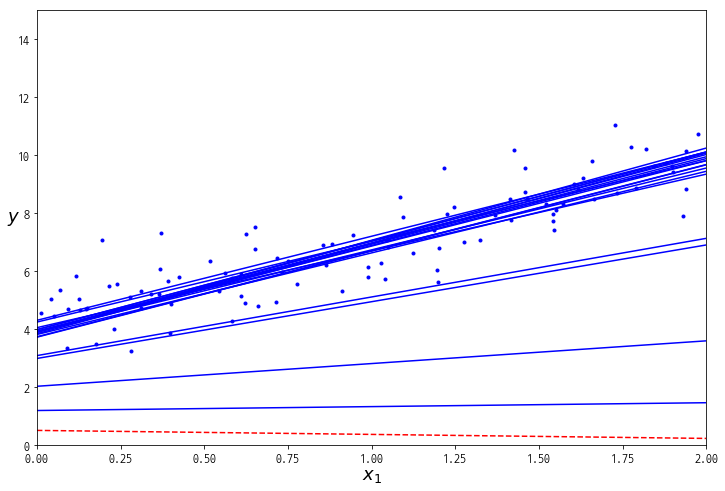

In [23]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization
plt.figure(figsize=(12, 8))
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
plt.show()                                           

In [24]:
theta

array([[4.21076011],
       [2.74856079]])

scikit-learn에서 SGD 방식으로 linear regression을 사용하려면 기본값으로 MSE함수를 최적화하는 SGDRegressor 클래스를 사용  
다음 코드는 학습률 0.1로 기본 학습 스케줄을 사용해 epoch를 50번 수행  
Regularization은 전혀 사용하지 않음  

In [25]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [26]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16782089]), array([2.72603052]))

### 3-2-7 Mini-batch gradient descent

* 각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그래디언트를 계산하는 것이 아니라 mini-batch라 부르는 임의의 sample set에 대해 Gradient를 계산  
* 확률적 경사 하강법에 비해 미니배치 경사 하강법의 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상  
* 특히 미니배치를 어느 정도 크게 하면 이 알고리즘은 parameter 공간에서 Stochastic Gradient Descent보다 덜 불규칙하게 움직임  

In [27]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [28]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [29]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

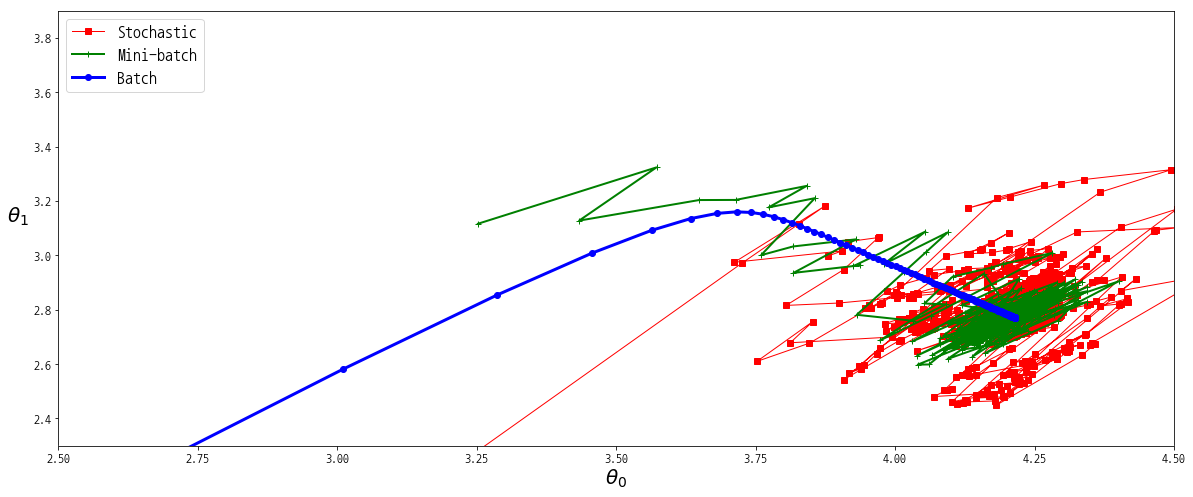

In [30]:
plt.figure(figsize=(20, 8))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

* 세 가지 경사 하강법 알고리즘이 훈련 과정 동안 parameter에서 움직인 경로  
* 모두 최솟값 근처에 도달했지만 배치 경사 하강법의 경로가 실제로 최솟값에서 멈춘 반면 확률적 경사 하강법과 미니배치 경사 하강법은 근처에서 맴돌음  
* 그렇지만 배치 경사 하강법에는 매 스텝에서 많은 시간이 소요되지만, 확률적 경사하강법과 미니배치 경사 하강법도 적헐한 학습 스케줄을 사용하면 최솟값에 도달함  

### 3-2-8 Polynomial regression

* 비선형 데이터를 학습하는데 선형 모델을 사용할 수 있음.  
* 간단한 방법은 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것.    

In [31]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [32]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

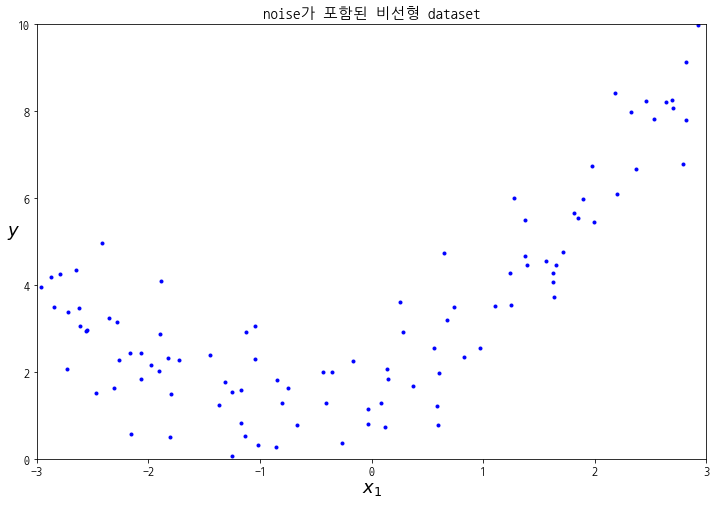

In [33]:
plt.figure(figsize=(12, 8))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title("noise가 포함된 비선형 dataset")

plt.show()

* 직선은 이 데이터에 잘 맞지 않은 것  
* scikit-learn의 PolynomialFeatures를 사용해 훈련 데이터를 변환  

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [35]:
X_poly[0]

array([-0.75275929,  0.56664654])

X_poly는 이제 특성 X와 특성의 제곱을 포함함

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

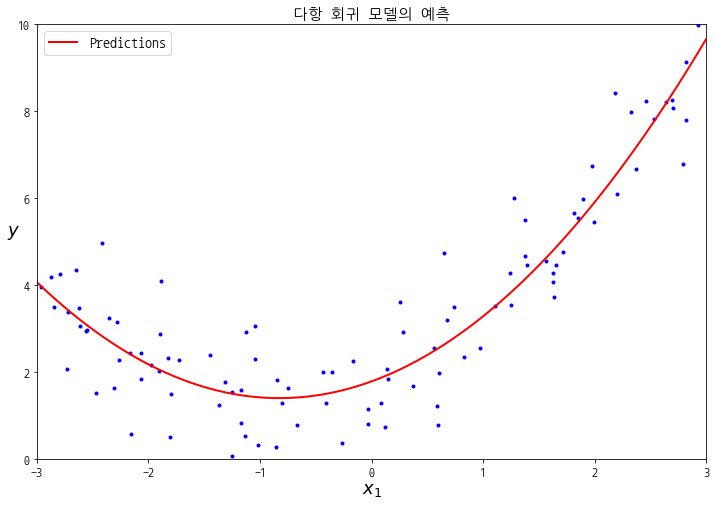

In [37]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.figure(figsize=(12, 8))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.title("다항 회귀 모델의 예측")

plt.show()

lin_reg.intercept_, lin_reg.coef_: (array([1.78134581]), array([[0.93366893, 0.56456263]]))에 의해  
$\hat{y} = 0.56456263x^{2}_{1}+0.93366893x_{1}+1.78134581$ 으로 예측됨 
실제원래함수가

$y = 0.5x_{1}^{2} +1.0x_{1}+2.0 + whitenoise$  

특성이 여러 개일 때는 다항 회귀는 이 특성 사이의 관계를 찾을 수 있음  
예를들어 2개의 특성 a, b가 있을 때, degree=3으로 PolynomialFeatures를 적용하면 $a^{3}, b^{3}, a^{1}b^{2}, a^{2}b^{1}, a^{1}b^{1}, a^{2}, b^{2}$까지 모두 추가함  

PolynomialFeatures(degree=d)를 적용하면 특성이 n개인 특성이$\frac{(n+d)!}{d!n!}$개인 배열로 변환  

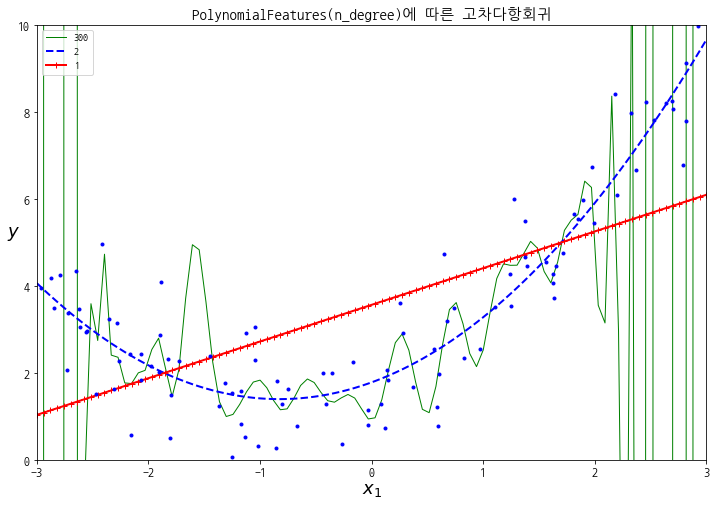

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

plt.figure(figsize=(12, 8))
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title("PolynomialFeatures(n_degree)에 따른 고차다항회귀")
plt.show()

* degree=300일때는 훈련데이터에 과대적합  
* 선형모델은 과소적합  
* 이 경우 가장 잘 일반화가 된 모델은 2차 다항회귀  

### 3-2-9 Learning Curve

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    plt.figure(figsize=(12, 8))
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

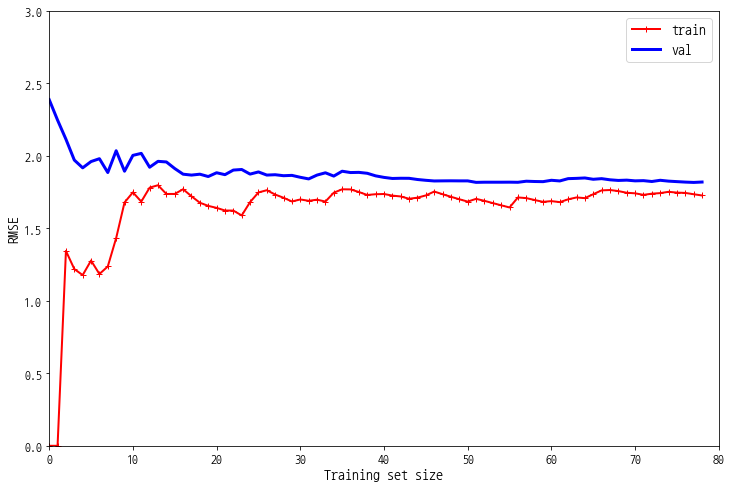

In [40]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
plt.show()

train set
* 그래프가 0에서 시작하므로 train set에 하나 혹은 2개의 샘플이 있을 때 모델이 완벽하게 작동함  
* train set에 샘플이 추가됨에 따라 노이즈도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는 것은 불가능함  
* 곡선이 어느정도 완만해질 때까지 오차가 계속 상승  

validation set
모델이 적은 수의 훈련 샘플로 훈련될 때는 제대로 될 수 없어서 검증 오차가 초반에 매우 큼  
모델이 train sample에 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소함  
선형 회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 완만해져서 train set의 그래프와 가까워짐  

> 이 learning curve는 과소적합 모델의 전형적인 모습  
두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 있음

--- 

같은 데이터에서 **10차 다항 회귀 모델의 learning curve**는 다음와 같음  

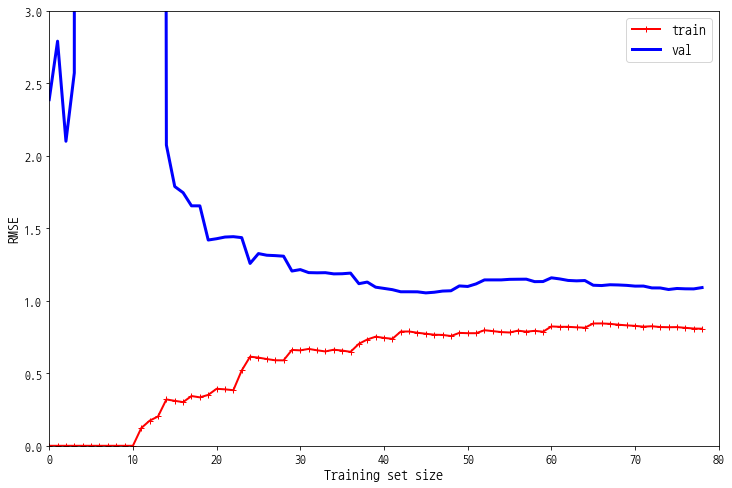

In [41]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                        

* train set의 오차가 선형 회귀보다 낮음  
* 두 곡선 사이에 공간이 선형 회귀보다 높음 --> 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 성능이 좋음 --> **과대적합의 특징**  
* 더 큰 훈련세트를 사용하면 두 곡선이 점점 가까워짐

## 3-3 Regularized models

### 3-3-1 Lidge Regression

* Lidge 회귀(Tikhonov 규제)는 규제가 추가된 선형 회귀 버전  
* 규제항 $\alpha \sum^{n}_{i=1}{\theta^{2}}$이 비용함수에 추가됨  
* 이는 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한한 작게 유지되도록 함  
* 규제항은 훈련하는 동안에만 비용함수에 추가됨  
* 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가  

> 일반적으로 훈련하는 동안 사용되는 비용 함수와 테스트에서 사용되는 성능지표는 다름  
규제를 떠나서 이들이 다른 이유는 훈련에 사용되는 비용 함수는 최적화를 위해 **미분 가능해야** 하기 때문  
반면 테스트에 사용되는 성능 지표는 **최종 목표에 가능한 한 가까워야 함**    
로그함수같은 비용함수를 사용하여 훈련시킨 분류기를 정밀도/재현유르을 사용하여 평가하는 것이 좋은 예  

---

**Lidge cost function**  

* $J(\theta)=MSE\left(\theta \right)+\alpha\frac{1}{2}\sum^{n}_{i=1}{\theta_{i}^{2}}$  
편향 $\theta_{0}$는 규제되지 않음(sumation이 i=1에서 시작함)  *w*를 특성이 가중지 벡터($\theta_{1}$에서 $\theta_{n}$)라 정의 하면 규제항은 $\frac{1}{2}\left(\left\|w \right\|^{2} \right)$과 같음($\frac{1}{2}$가 있는 이유는 미분을 편하게 하기 위함)  

* $\left\| \cdot \right\|$가 가중치 벡터의 $l_{2}$ norm임  
* 경사하강법에 적용하려면 MSE 그래디언트 백터에 $\alpha w$를 더하면됨  

> Lidge회귀는 입력특성의 스케일이 민감하기 때문에 수행하기 전에 데이터의 스케일을 맞추는 것이 중요  
대부분 규제가 있는 모델을 마찬가지로 적용

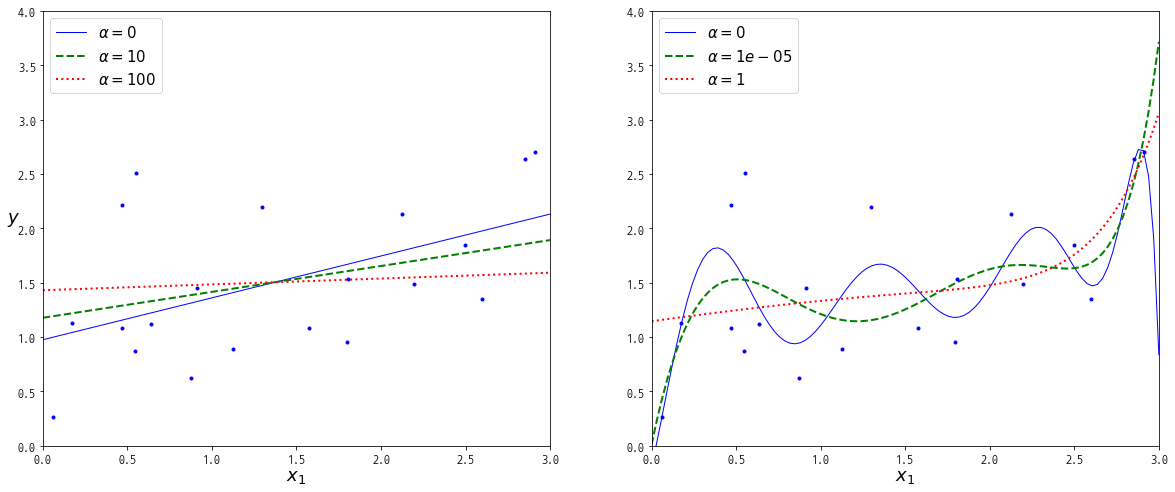

In [42]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(20, 8))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

* 왼쪽 그래프는 릿지로 인한 선형적인 예측  
* 오른쪽 그래프는 PolynomialFeatures(degree=10)을 사용해 데이터를 확장하고 StandardScaler로 데이터를 표준화 시킨후 릿지 모델을 적용  
이는 릿지 규제를 사용한 다항 회귀가 됨  
* $\alpha$가 커질수록 직선에 가까워짐

### 3-3-2 정규방정식을 사용한 Lidge회귀

$\hat{\theta}=\left(X^{T}\cdot X + \alpha A\right)^{-1}\cdot X^{T}\cdot y$  
*A*: 편향에 해당하는 맨 왼쪽 위의 원소가 0인 $(n+1)\times(n+1)$의 단위행렬(idenitty matrix)  

Anderé-Louis Cholesky가 발견한 행렬 분해(matrix factorization)를 사용하여 위 식을 변형한 방정식을 사용

In [43]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

---

Stochastic Gradient Descent를 사용

In [44]:
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.49905184])

In [45]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

### 3-3-3 Lasso Regression

Lasso(Least Absolute Shrinkage and Selection Operator)회귀는 선형회귀의 다른 규제버전  

Lidge contfunction: $J(\theta)=MSE\left(\theta \right)+\alpha\frac{1}{2}\sum^{n}_{i=1}{\theta_{i}^{2}}$  
Lasso costfunction: $J(\theta)=MSE\left(\theta \right)+\alpha\sum^{n}_{i=1}{\theta_{i}}$  

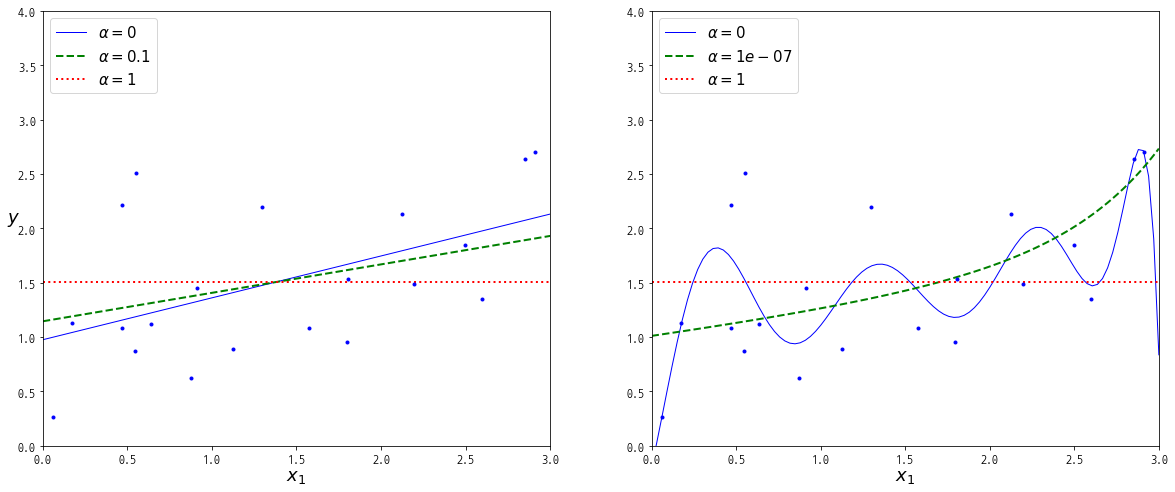

In [46]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(20, 8))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

plt.show()

* Lasso 회귀의 중요한 특징은 덜 중요한 특성의 가중치를 완전히 제거하려고 함  
* 오른쪽 그래프에서 점선$\alpha=10^{-7}$은 거의 선형으로 보임  
* 차수가 높은 다항 특성의 가중치가 모두 0이됨

In [47]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignoring bias term
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

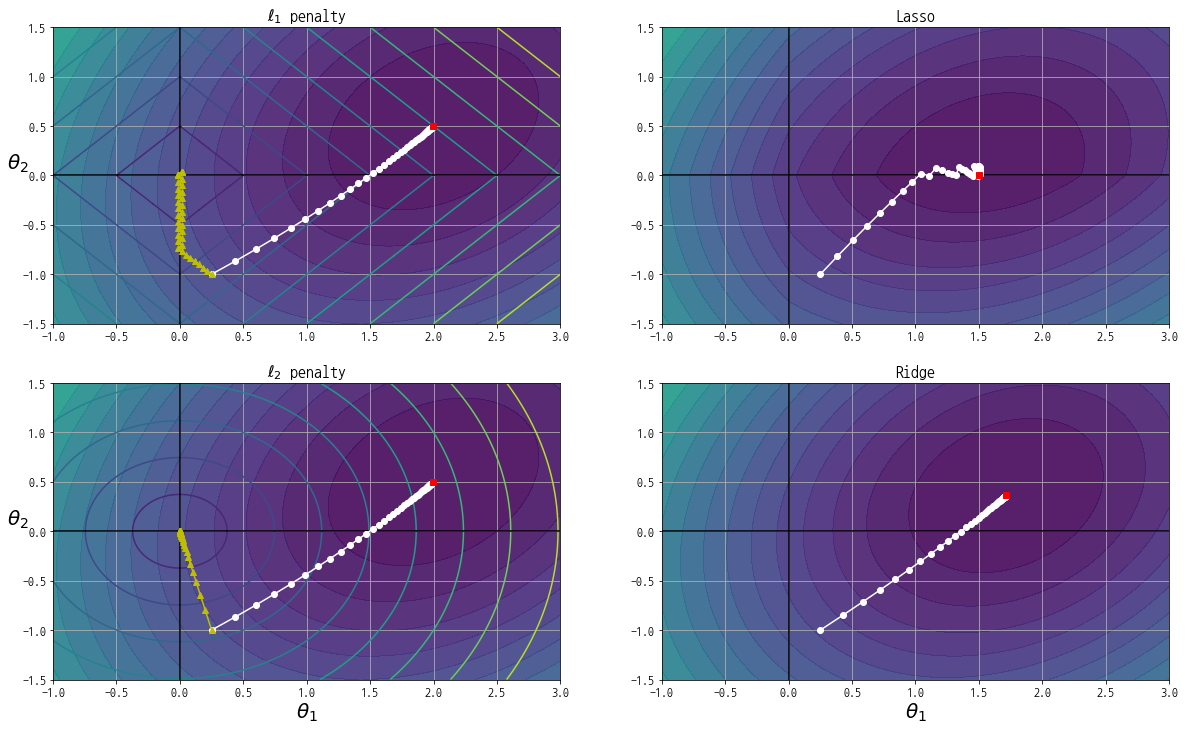

In [48]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(20, 12))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0)

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)

plt.show()

왼쪽 위 그래프에서
* 배경의 등고선(타원형)은 규제가 없는 ($\alpha$=0)MSE 비용함수를 나타냄  
* 하얀색 점은 이 비용 함수에 대한 배치 경사법의 경로  
* 다이아몬드 형태의 등고선은 $l_{1}$ 패널티를 나타내며 삼각형은 이 패널티에 대한 ($\alpha$ -> $\infty $) 배치 경사 하강법의 경로  
* 경로가 먼저 $\theta_{1}=0$에 도달하고 나서 $\theta_{2}=0$에 다다를 때까지 좌표축을 따라 내려감  

---

오른쪽 위그래프에서
* 배경의 등고선은 ($\alpha$=0.5의 $l_{1}$패널티)가 더해진 비용함수  
* 전역 최솟값은 $\theta_{2}=0$ 축에 있음  
* 배치 경사 하강법이 먼저 $\theta_{2}=0$에 도달하고 전역 최솟값에 도달할 때까지 좁은 경로를 따라 이동  
* 경로가 먼저 $\theta_{1}=0$에 도달하고 나서 $\theta_{2}=0$에 다다를 때까지 좌표축을 따라 내려감   
* 라쏘 비용 함수에서 지그재그로 튀는 경향을 보이는 이유는 $\theta_{2}=0$에서 갑자기 기울기가 바뀌기 때문  
전역 최솟값에 수렴하기 위해서는 학습률을 점진적으로 줄여야함

Lasso의 비용함수는 $\theta_{i}=0(i=1, 2, \cdots, n)$에서 미분 가능하지 않음  
하지만 $\theta_{i}=0$일때 subgradient vector를 사용하면 경사하강법을 적용하는데 문제가 없음 -- 미분이 불가능한 지점 근처의 그래이던트들의 중간값으로 생각할 수 있음  
라쏘 회귀의 서브그래이언트 벡터

$g(\theta, \quad j)=\triangledown_{\theta}MSE(\theta)+\alpha\begin{pmatrix} sign(\theta _{ 1 }) \\ sign(\theta _{ 2 }) \\ \vdots  \\ sign(\theta _{ n }) \end{pmatrix}$ 여기서 $sign(\theta_{i})=  \begin{cases}  -1\quad \theta _{ i }<0\\ 0\quad \quad \theta _{ i }=0\\ +1\quad \theta _{ i }>0  \end{cases}$

Lasso 대신 SGDRegressor(penalty="l1")을 사용할 수도 있음

In [49]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### 3-3-4 Elastic Net

* Elastic Net은 릿지 회귀와 라쏘 회귀를 절충한 모델  
* 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합정도는 비율 r을 사용해 조절  
* r=0이면 릿지회귀, r=1이면 라쏘회귀  

**elesticnet 비용 함수**  
$J(\theta) = MSE(\theta) + r\alpha\sum^{n}_{i=1}{\left|\theta_{i} \right|}+\frac{1-r}{2}\alpha\sum^{n}_{i=1}{\theta^{2}}$  
규제가 약간 있는 것이 대부분의 경우에 좋으므로 평범한 선형 회귀는 피하는 것이 좋음  
이 모델은 이전에 이야기한 것처럼 불필요한 특성의 가중치를 0으로 만들어줌  

> 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 라쏘보다는 elastic net을 선호  
라쏘가 특성 수가 샘플 수(n)보다 많으면 최대 n개의 특성을 선택. 또한 여러 특성이 강하게 연관되어 있으면 이들 중 임의의 특성 하나를 선택

In [50]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## 3-4 Early stopping  

* 경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 아주 색다른 방식은 검증 에러가 최솟값에 도달하면 바로 훈련을 중지  
* 이를 조기 종료 early stopping이라 함  

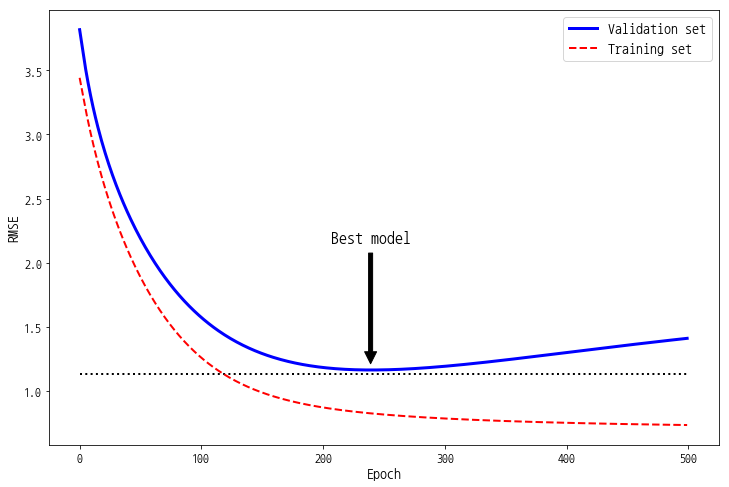

In [51]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(12, 8))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

* epoch가 진행됨에 따라 알고리즘에 점차 학습되어 훈련 세트에 대한 예측 에러 RMSE와 검증 세트에 대한 예측 에러가 줄어듬  
* 감소하던 검증 에러가 멈추었다가 다시 상승 --> 모델이 훈련 데이터에 과대적합되기 시작하는 것을 의미  

**조기 종료는 검증 에러가 최소에 도달하는 즉시 훈련을 멈춤**  
이 규제 테크닉은 매우 효과적이고 간단해서 제프리 힌튼(Geoffrey Hinton)이 훌륭한 공짜 점심이라고 부름

> 확률적 경사 하강법이나 미니배치 경사 하강법에서는 곡선이 매끄럽지 않아 최솟값에 도달했는지 확인하기가 어려움  
일정 시간 동안 최솟값보다 클 때(모델이 더 나아지지 않는다고 확신이 들 때) 학습을 멈추고 검증 에러가 최소였을 때의 모델 파라미터로 되돌림   

In [52]:
from tqdm import tqdm_notebook
from sklearn.base import clone

# warn_start=True로 지정하면 fit() 메서드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어감  
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in tqdm_notebook(range(1000)):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [53]:
best_epoch, best_model

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
        eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
        learning_rate='constant', loss='squared_loss', max_iter=1,
        n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
        random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
        verbose=0, warm_start=True))

## 3-5 Logistic regression

* Logistic regression는 샘플이 특성 클래스에 속할 확률을 추정하는데 널리 사용됨  
* 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측함  

### 3-5-1 확률 추정

선형 회귀 모델과 같이 로지스틱 회귀 모델은 입력 특성의 가중치 합을 계산 후 편향을 더함  
$\hat{p}=h_{\theta}(x)=\sigma\left(\theta^{T}\cdot x \right)$  

* 로지스틱은 0과 1 사이의 값을 출력하는 sigmoid function임  
$\sigma(t)=\frac{1}{1+e^{-t}}$

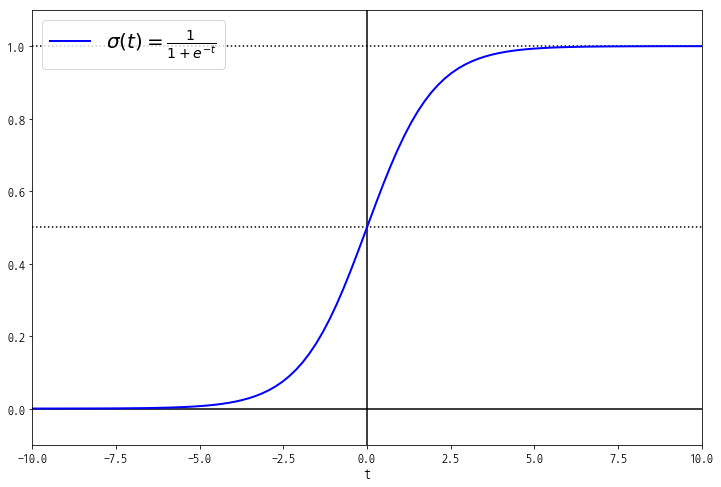

In [54]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(12, 8))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

* 로지스틱 회귀 모델이 sample x가 양성 클래스에 속할 확률 $\hat{p}=h_{\theta}(x)$를 추정하면 이에 대한 예측 $\hat{y}$을 쉽게 구할 수 있음  

**로지스틱 회귀 모델 예측**  
$\hat{y}=\begin{cases}  0 \quad \hat{p} < 0.5일\quad 때 \\ 1 \quad \hat{p} \ge 0.5일\quad 때\end{cases} $  

t < 0이면 $\sigma(t)$ < 0.5, t $\ge$ 0이면 $\sigma(t) \ge 0.5$이므로 로지스틱 회귀 모델은 $\theta^{T}\cdot x$가 양수일 때 1(positive)이라고 예측하고, 음수일 때 0(negative)이라 예측함  

### 3-5-2 train and cost function  

* 로지스틱의 훈련 목적은 양성 샘플(y=1)에 대해서 높은 확률을 추정하고 음성 샘플(y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 $\theta$를 찾는 것  

**로지스틱 회귀 대한 비용 함수**  
$c(\theta) =\begin{cases}  -log(\hat{p}) \quad \quad  y=1일\quad때 \\-log(1-\hat{p})\quad y=0일\quad때 \end{cases}$  

* 이 비용함수는 t가 0에 가까워지면 -log(t)가 매우 커지므로 타당함  
그러므로 모델이 양성 샘플을 0에 가까운 확률로 추정해도 비용이 증가함  

* 반면 t가 1에 가까우면 -log(t)는 0에 가까워짐  
따라서 기대한 대로 음성 샘플의 확률을 0에 가깝게 추정하거나 양성 샘플의 확률을 1에 가깝게 추정하면 비용은 0에 가까워짐  

* 전체 훈련 세트에 대한 비용함수는 모든 훈련 샘플의 비용을 평균함  
이를 **로그 손실(log loss)**이라 부름  

**로지스틱 회귀의 비용함수(로그 손실)**  
$J(\theta)=-\frac{1}{m}\left[y^{(i)}log(\hat{p}^{(i)}) + \left(1-y^{(i)} \right)log\left(1-\hat{p}^{(i)} \right) \right]$  

* 이 비용함수의 최솟값을 계산하는 알려진 해가 없음  
* 이 비용 함수는 볼록함수이므로 경사 하강법이 전역 최솟값을 찾는 것을 보장  

* 이 비용 함수의 j번째 모델 파라미터 $\theta_{j}$에 대해 편미분을 진행하면 아래식과 같음  

**로지스틱 비용 함수의 편도함수**  
$\frac { \partial  }{ \partial \theta _{ j } } J(\theta )=\frac { 1 }{ m } \sum _{ i=1 }^{ m }{ \left( \sigma \left( \theta ^{ T }\cdot x^{ (i) } \right)  -y^{(i)}\right)  }x_{j}^{(i)}$  

* 각 샘플에 대해 예측 오차를 계산하고 j번째 특성값을 곱해서 모든 훈련 샘플에 대해 평균을 냄  
* 모든 편도함수를 포함한 그래디언트 벡터를 만들면 배치 경사 하강법 알고리즘을 사용할 수 있음  

### 3-5-3 Decision Boundary(결정 경계)

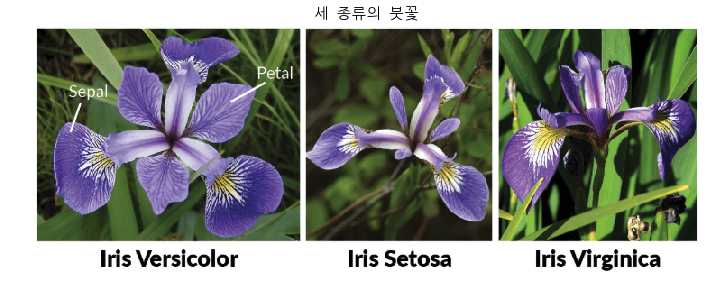

In [55]:
import matplotlib.image as mpimg

iris_img = mpimg.imread("./images/iris.png")
plt.figure(figsize=(12, 6))
plt.imshow(iris_img)
plt.axis("off")
plt.title("세 종류의 붓꽃")
plt.show()

In [56]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [57]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [58]:
X = iris["data"][:, 3:]  # petal width, 꽃잎의 너비
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [59]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42, n_jobs=4)
log_reg.fit(X, y)

/home/ururu/.conda/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=4,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

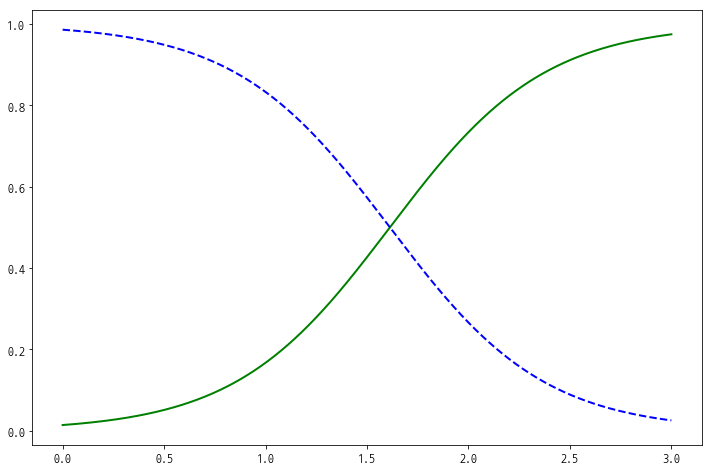

In [60]:
# 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률 계산  
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(12, 8))
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.show()

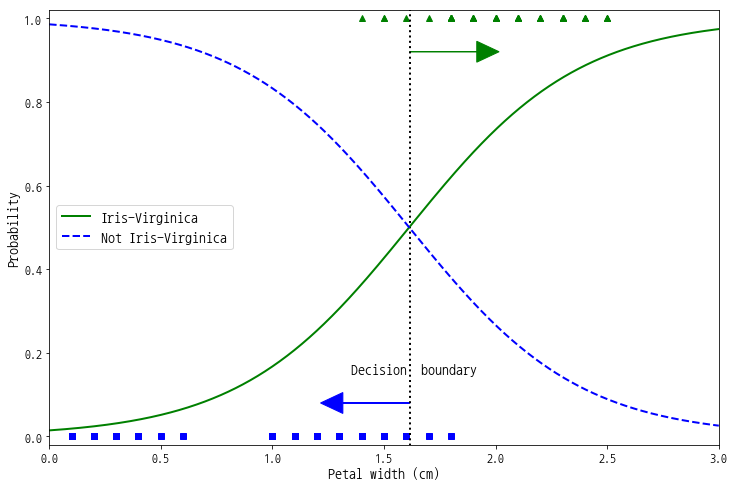

In [61]:
# 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률 계산  
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(12, 8))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

* Iris-Verginica(삼각형으로 표시)의 꽃잎 너비는 1.4~2.5cm에 분포  
* 반면 다른 붓꽃(사각형으로 표시)은 일반적으로 꽃잎 너비가 더 작아 0.1~1.8cm에 분포  
* 꽃잎 너비가 2cm 이상인 꽃은 분류기가 Iris-Verginica라고 분류함  
* 반면 1cm 아래면 Iris-Verginica가 아니라고 확신  

--- 

* 이 두 극단 사이에는 분류가 확실하지 않아 양쪽의 확률이 똑같이 50%가 되는 1.6cm 근방에서 decision boundary가 만들어짐  
* 꽃잎 너비가 1.6cm보다 크면 분류기는 Iris-Verginica로 분류하고, 그보다 작으면 아니라고 예측함   

In [62]:
decision_boundary

array([1.61561562])

In [63]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

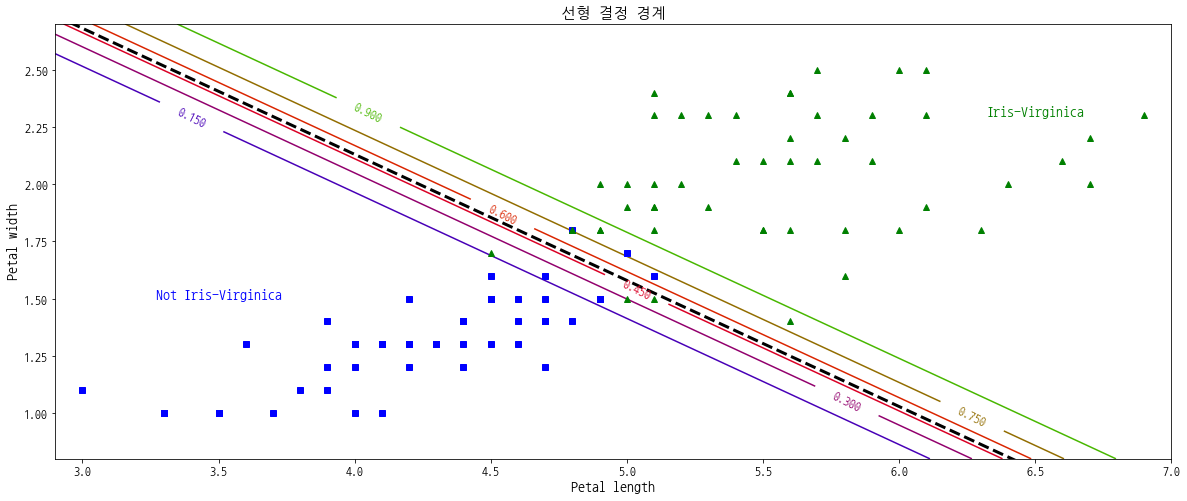

In [64]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(20, 8))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.title("선형 결정 경계")

plt.show()

* 같은 데이터셋을 꽃잎 너비와 꽃잎 길이 2개의 특성으로 보여줌  
* 훈련이 끝나면 로지스틱 회귀 분류기가 이 두 특성을 기반으로 하여 새로운 꽃이 Iris-Verginica인지 확률을 추정할 수 있음  
* **점선**은 모델이 50% 확률을 추정하는 지점으로 이 모델의 **결정 경계**임  
* 15%(왼쪽 아래)부터 90%(오른쪽 위)까지 수평한 직선들은 모델이 특정 확률을 출력하는 포인트를 나타냄  
* 이 경계는 $\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}=0$을 만족하는 포인트 x의 집합  

--- 

* 모델은 맨 오른쪽 위의 직선을 넘어서 있는 꽃들을 90% 이상의 확률로 Iris-Virginica라고 판단함  
* scikit-learn의 LogisticRegression 모델의 규제 강도를 조절하는 하이퍼파라미터는 **alpha**가 아니고 그 역수에 해당하는 **C**임  
* C가 높을수록 모델의 규제가 줄어듬  

### 3-5-4 softmax regression

* 로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있음  
* 이를 **Softmax Regression** 또는 **Multinomial Logistic Regression**라고 함  

---

sample **x**가 주어지면 먼저 Softmax Regression 모델이 각 클래스 k에 대한 점수 $s_{k}(x)$를 계산  

**클래스 k에 대한 Softmax 점수**  
$s_{k}(x)=\left(\theta^{(k)} \right)^{T}\cdot x$  
* 각 클래스는 자신만의 파라미터 벡터 $\theta^{(k)}$가 있으며 이 벡터들은 parameter matrix $\Theta$에 행으로 저장  
* sample **x**에 대해 각 클래스의 점수가 계산되면 Softmax 함수를 통과시켜 클래스 k에 속할 확률 $\hat{p}_{k}$를 추정할 수 있음  
* 이 함수는 각 점수에 지수 함수를 적용한 후 정규화 함  

**Softmax 함수**  
$\hat{p}_{k}=\sigma(s(x)_{k}) = \frac{exp(s_{k}(x))}{\sum^{k}_{j=1}{exp(s_{j}{(x)})}}$  
* K: 클래스 수  
* s(x): sample **x**에 대한 각 클래스의 점수를 담고 있는 벡터  
* $\sigma(s(x))_{k}$: sample **x**에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 k에 속할 추정 확률  

> 로지스틱 회귀 분류기와 마찬가지로 Softmax 회귀 분류기는 위의 식처럼 추정 확률이 가장 높은 클래스(그냥 가장 높은 점수를 가진 클래스)를 선택  

**Softmax 회귀 분류기의 예측**  
$\hat { y } =\underset { k }{ argmax } \sigma (s(x))_{ k }=\underset { k }{ argmax } s_{ k }(x)=\underset { k }{ argmax } \left( (\theta ^{ (k) })^{ T }\cdot x \right) $  
* argmax 연산은 함수를 최대화하는 변수의 값을 반환  
* 이 식에서 추정 확률 $\sigma(s(x))_{k}$가 최대인 k값을 반환  

> 소프트맥스 회귀 분류기는 한 번에 하나의 클래스만 예측함  
즉 종류가 다른 붓꽃 같이 상호 배타적인 클래스에서 사용해야함  
하나의 사진에서 여러 사람의 얼굴을 인식하는 데는 사용할 수 없음  

* 모델이 타겟 클래스에 대해서 높은 확률을 추정하도록 만드는 것이 목표이며, 크로스 엔트로피 비용함수를 최소화 하는 것은 타겟 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 이 목적에 부합  
* 크로스 엔트로피는 추정된 클래스의 확률이 타겟 클래스에 얼마나 잘 맞는지 측정하는 용도로 종종 사용  
**Cross-entropy cost function**  
$J(\Theta )=-\frac { 1 }{ m } \sum _{ i=1 }^{ m } \sum _{ k=1 }^{ K }{ y^{ (i) }_{ k }log\left(\hat { p } _{ k }^{ (i) }\right) }$  
* i번째 sample에 대한 타겟 클래스가 k일 때 $y^{(i)}_{k}$가 1이고, 그 외에는 0임  

--- 

**소프트맥스 회귀를 사용해 붓꽃을 세 개의 클래스로 분류**  

* scikit-learn의 Logistic Regression은 클래스가 둘 이상일 때 기본적으로 일대다(OvA)전략을 사용  
* 하지만 multi_class 매개변수를 "multinomial"로 바꾸면 소프트 맥스 회귀를 사용할 수 있음  
* 소프트맥스 회귀를 사용하려면 solver 매개변수에 "lbfgs(Limited-memory Broyden-Fletcher-Goldfarb-Shanno)"와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야함  

In [65]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42, n_jobs=4)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=4, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

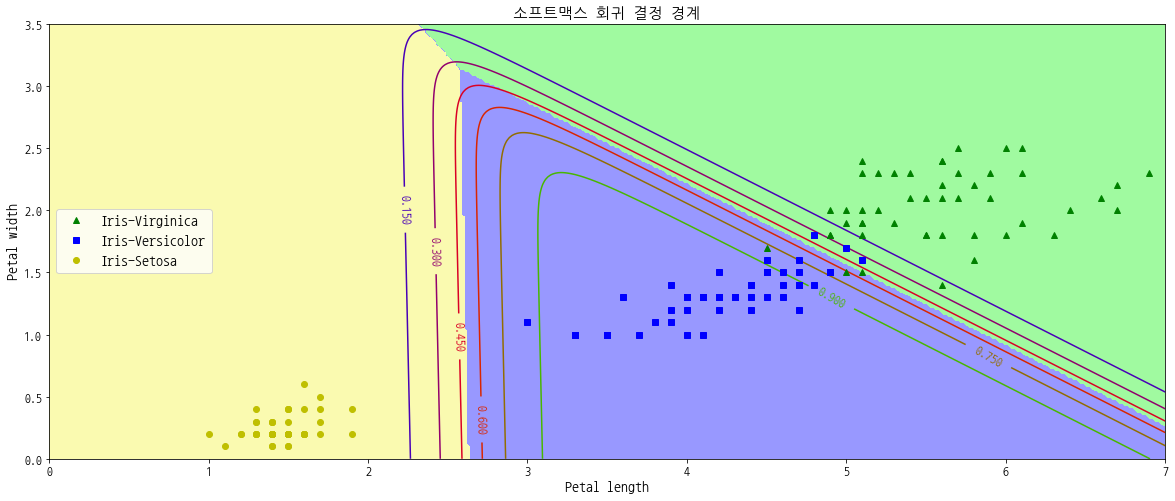

In [66]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(20, 8))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.title("소프트맥스 회귀 결정 경계")

plt.show()

* 클래스 사이의 결정 경계가 모두 선형  
* Iris-Versicolor 클래스에 대한 확률을 곡선으로 나타냄(0.450인 직선은 45% 확률 경계를 나타냄)  
* 이 모델이 추정 확률 50% 이하인 클래스를 예측할 수도 있음(모든 결정 경계가 만나는 지점에서는 모든 클래스가 동일하게 33%의 추정 확률을 가짐)  

In [67]:
softmax_reg.predict([[5, 2]])

array([2])

In [68]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## 3-6 Exercise

### 3-6-1. Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn)

In [69]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

모든 인스턴스에 bias 추가 ($x_0 = 1$):

In [70]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [71]:
np.random.seed(2042)

훈련 세트와 테스트 세트 분할

In [72]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

* 목표는 현재 클래스 index (0, 1 또는 2)이지만 Softmax 회귀 모델을 학습하려면 대상 클래스 확률이 필요  
* 클래스 인덱스의 벡터를 각 인스턴스에 대해 하나의 핫 벡터를 포함하는 행렬로 변환하는 작은 함수를 작성

In [73]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [74]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [75]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

학습 집합과 테스트 집합에 대한 목표 클래스 확률 행렬을 작성  

In [76]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Softmax function은 다음과 같음  

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [77]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [78]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

* 이론적으로 간단함.  
* 수학 방정식을 파이썬 코드로 변환하는 것  
* 특히 용어 나 색인의 순서를 쉽게 섞을 수 있음  
* 확실하지 않은 경우 방정식의 각 용어 모양을 기록하고 코드의 해당 용어가 밀접하게 일치하는지 확인해야함.  
    
$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

equation the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$는 $\hat{p}_k^{(i)} = 0$ 이라 계산이 안될 수도 있음. 

그래서 $\epsilon$을 $\log\left(\hat{p}_k^{(i)}\right)$에 더해야 함. 그러면  `nan`을 피할 수 있음

In [79]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693314
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.47292289721922487
3500 0.44824244188957774
4000 0.42786510939287936
4500 0.41060071429187134
5000 0.3956780375390374


Softmax model은 훈련되었고 model parameter를 보면 다음과 같음  

In [80]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

정확도는 다음과 같음

In [81]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

$\ell_2$ regularization. 

In [82]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629505
1000 0.5036400750148942
1500 0.49468910594603216
2000 0.4912968418075476
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.48903512443978603
4000 0.4889173621830818
4500 0.48886433374493027
5000 0.48884031207388184


Because of the additional $\ell_2$ penalty, the loss seems greater than earlier, but perhaps this model will perform better? Let's find out:

In [83]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

early stopping

In [84]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.7096017363419875
500 0.5739711987633519
1000 0.5435638529109128
1500 0.5355752782580261
2000 0.5331959249285545
2500 0.5325946767399383
2765 0.5325460966791898
2766 0.5325460971327978 early stopping!


In [85]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

plotting

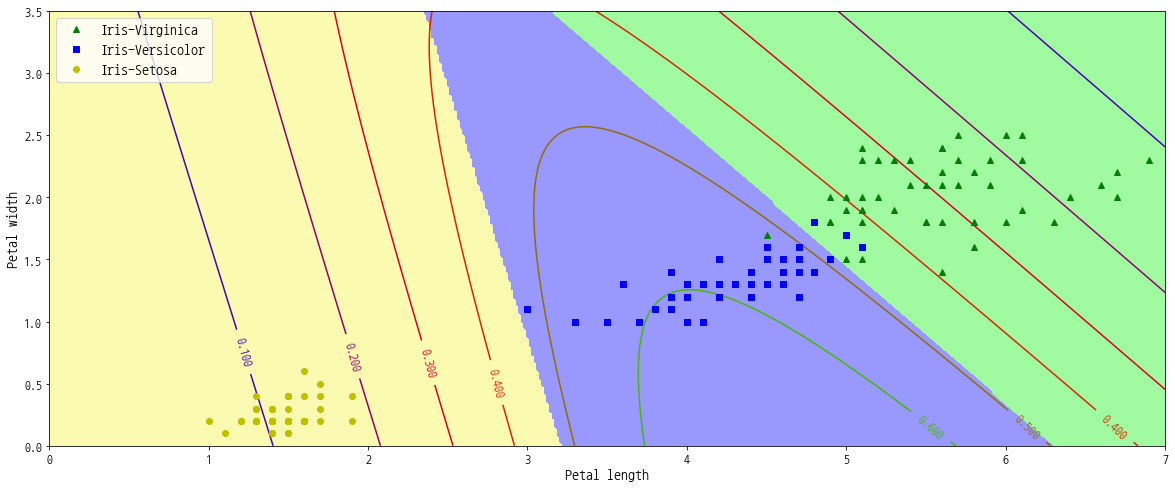

In [86]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(20, 8))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

the final model's accuracy

In [87]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333